In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
from scipy import linalg

import sys
sys.path.insert(0,'..')
import specsens as ss

In [36]:
sample_freq = 1e6  # in Hz
length = 0.1  # in s
# signal_strength = -5.0  # in dB
# noise_strength = 13.0  # in dB
signal_strength = 0.0  # in dB
noise_strength = -10.0  # in dB

wm = ss.WirelessMicrophone(f_sample=sample_freq, t_sec=length)
sig = wm.get_soft(f_center=1e5, power=signal_strength, dB=True)

wgn = ss.WhiteGaussianNoise(f_sample=sample_freq, t_sec=length)
noise = wgn.get_signal(power=noise_strength, dB=True)

assert wm.num_samples == wgn.num_samples  # ensure noise and signal have same length
num_samples = wm.num_samples

both = sig + noise  # create actual signal ('both') comprising of signal and additive white gaussian noise (AWGN)

print('Signal power: %.2f dB' % (ss.util.signal_power(sig, dB=True)))
print('Noise power:  %.2f dB' % (ss.util.signal_power(noise, dB=True)))
print('SNR:          %.2f dB' % (ss.util.snr(sig, noise, dB=True)))
print('Num Samples:  %d ' % (num_samples))

# Note, that Parseval's theorem holds
from scipy import fft
print("Freq Energy:  %.2f" % (np.sum(np.abs(fft.fft(both))**2)/sample_freq))
print("Time Energy:  %.2f" % (np.sum(np.abs(both)**2)))

Signal power: 0.00 dB
Noise power:  -10.01 dB
SNR:          10.01 dB
Num Samples:  100000 
Freq Energy:  11015.36
Time Energy:  110153.58


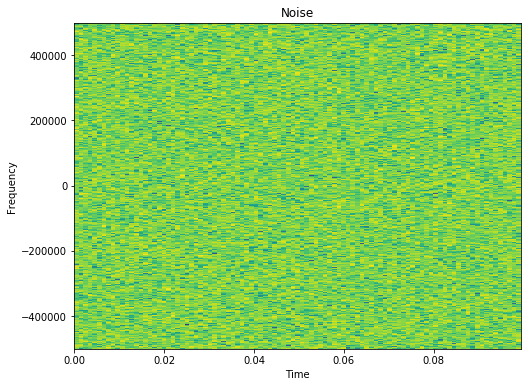

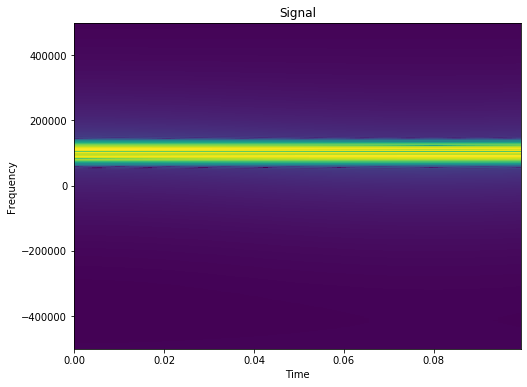

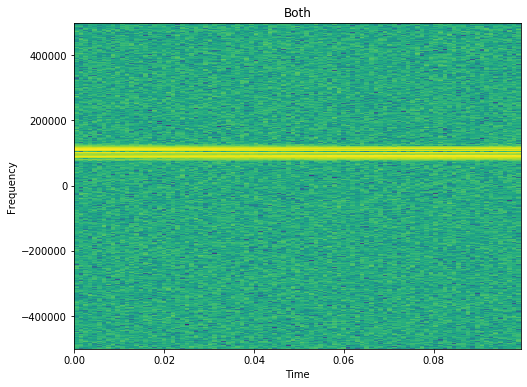

In [27]:
# Plot the resulting signals using matplotlib
nfft = 1024

plt.figure(figsize=(8, 6))
plt.specgram(noise,
             NFFT=nfft,
             Fs=sample_freq,
             scale='dB',
             cmap='viridis',
             noverlap=0,
             mode='psd',
             window=signal.get_window('flattop', nfft))
plt.title("Noise")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
plt.specgram(sig,
             NFFT=nfft,
             Fs=sample_freq,
             scale='dB',
             cmap='viridis',
             noverlap=0,
             mode='psd',
             window=signal.get_window('flattop', nfft))
plt.title("Signal")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
plt.specgram(both,
             NFFT=nfft,
             Fs=sample_freq,
             scale='dB',
             cmap='viridis',
             noverlap=0,
             mode='psd',
             window=signal.get_window('flattop', nfft))
plt.title("Both")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

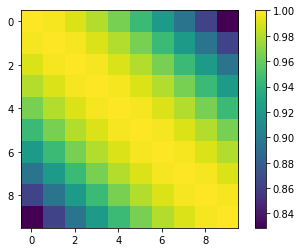

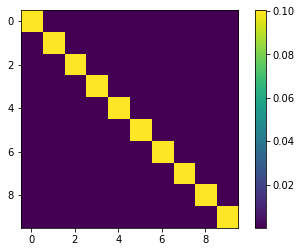

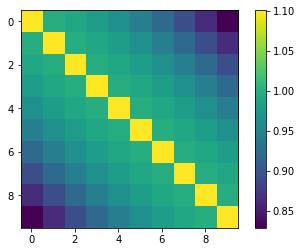

Noise only: 1.0240543313000634
Noise and signal: 98.23467438727177
Diff: 97.2106200559717


In [34]:
def cal(y, l):
    y = np.reshape(y, (-1, 1))
    r = np.zeros((l, l), dtype = np.complex128)
    for i in range(0, len(y)-l):
        r += np.dot(y[i:i+l], y[i:i+l].conj().T)
    return r / (len(y)-l)

l = 10
c_sig = cal(sig, l)
c_noise = cal(noise, l)
c_both = cal(both, l)

plt.imshow(abs(c_sig))
plt.colorbar()
plt.show()

plt.imshow(abs(c_noise))
plt.colorbar()
plt.show()

plt.imshow(abs(c_both))
plt.colorbar()
plt.show()

# def test1(x):
#     t1 = x.sum()
#     t2 = x.trace()
#     return t1/t2

def test2(x):
    eig = linalg.eigvals(x)
    eig_max = np.abs(np.max(eig))
    eig_min = np.abs(np.min(eig))
    return eig_max/eig_min
    
print(f"Noise only: {test2(c_noise)}")
print(f"Noise and signal: {test2(c_both)}")
print(f"Diff: {test2(c_both)-test2(c_noise)}")

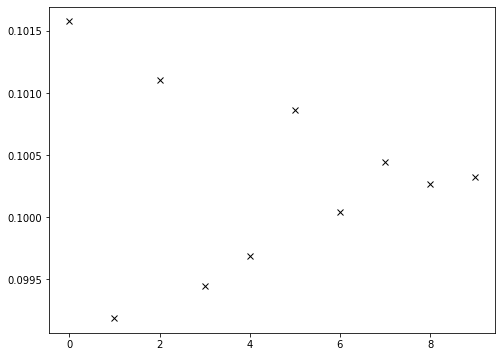

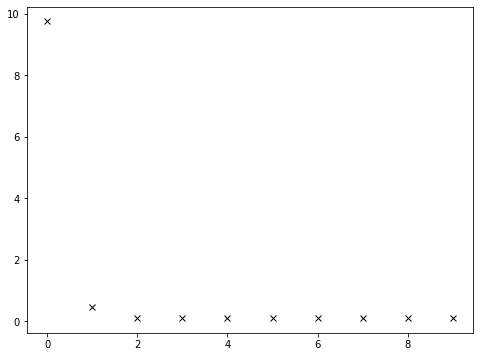

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(np.abs(linalg.eigvals(c_noise)), 'kx')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(np.abs(linalg.eigvals(c_both)), 'kx')
plt.show()